In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random 
import networkx as nx

In [ ]:
# nx.generators.social.karate_club_graph
G = nx.fast_gnp_random_graph(500,0.10,directed=False)
G.nodes()
G.edges()

EdgeView([(0, 12), (0, 26), (0, 39), (0, 41), (0, 42), (0, 54), (0, 60), (0, 65), (0, 70), (0, 71), (0, 74), (0, 75), (0, 82), (0, 94), (0, 97), (0, 101), (0, 102), (0, 106), (0, 120), (0, 152), (0, 161), (0, 168), (0, 172), (0, 175), (0, 178), (0, 179), (0, 189), (0, 193), (0, 236), (0, 249), (0, 252), (0, 261), (0, 268), (0, 272), (0, 282), (0, 291), (0, 292), (0, 298), (0, 307), (0, 325), (0, 344), (0, 350), (0, 365), (0, 368), (0, 374), (0, 375), (0, 376), (0, 383), (0, 388), (0, 411), (0, 418), (0, 424), (0, 432), (0, 442), (0, 444), (0, 447), (0, 461), (0, 477), (0, 478), (0, 485), (0, 487), (0, 491), (1, 7), (1, 13), (1, 19), (1, 28), (1, 55), (1, 93), (1, 99), (1, 100), (1, 120), (1, 123), (1, 137), (1, 140), (1, 141), (1, 149), (1, 151), (1, 175), (1, 181), (1, 195), (1, 196), (1, 197), (1, 212), (1, 213), (1, 229), (1, 235), (1, 236), (1, 256), (1, 261), (1, 265), (1, 270), (1, 274), (1, 279), (1, 290), (1, 329), (1, 333), (1, 339), (1, 358), (1, 381), (1, 401), (1, 402), (1,

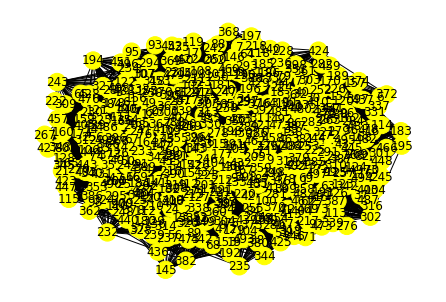

In [ ]:
color_map = []
for node in G:
     color_map.append('yellow')      
nx.draw(G,pos=nx.spring_layout(G), node_color=color_map, with_labels='S')
plt.show()

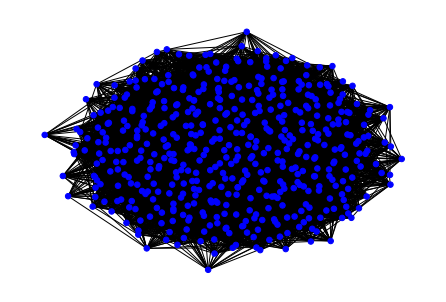

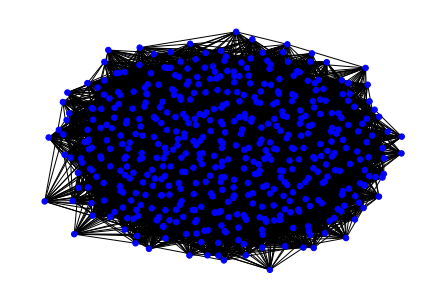

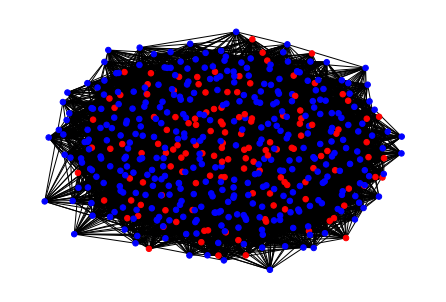

time taken to draw graph:  1.7898683419989538


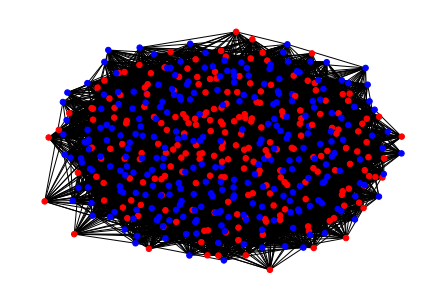

time taken to draw graph:  1.8096807289985009


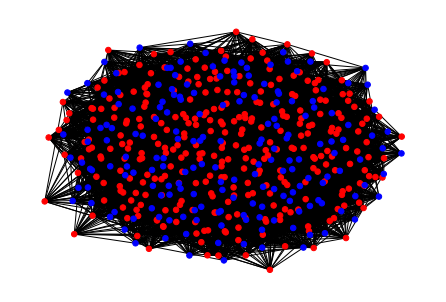

time taken to draw graph:  1.7838669669981755


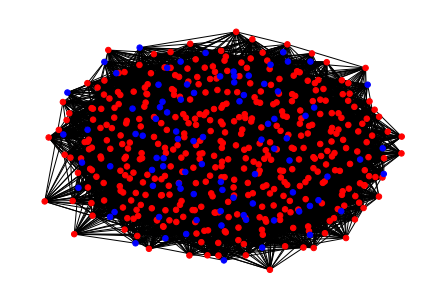

time taken to draw graph:  1.8217389340024965


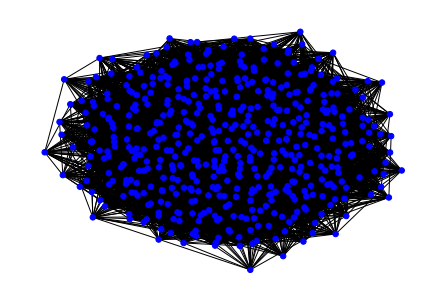

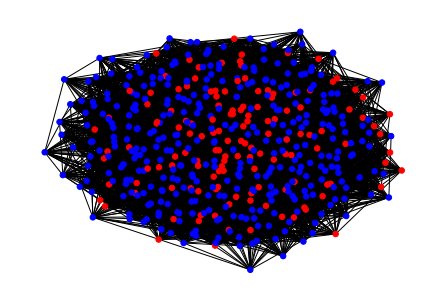

time taken to draw graph:  1.7702150869990874


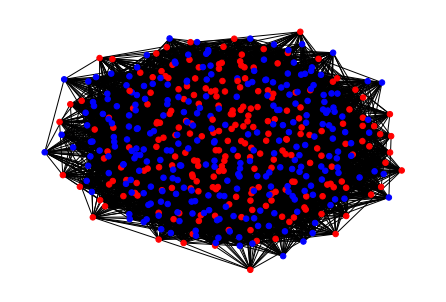

time taken to draw graph:  1.7738722840003902


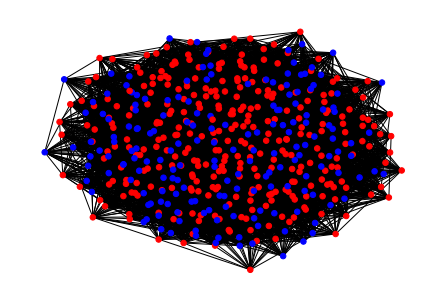

time taken to draw graph:  1.7993710119990283


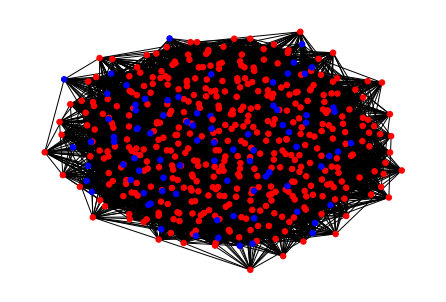

time taken to draw graph:  1.8000126519982587


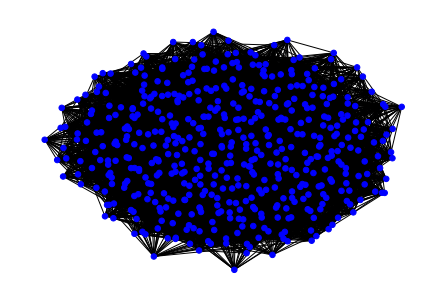

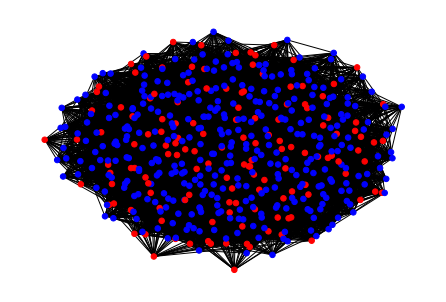

time taken to draw graph:  1.686136649997934


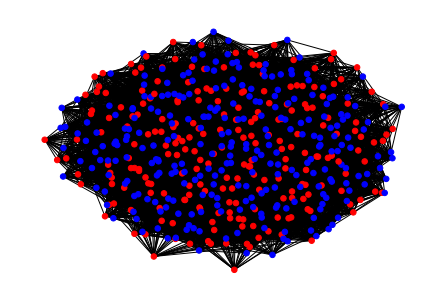

time taken to draw graph:  1.8205192960012937


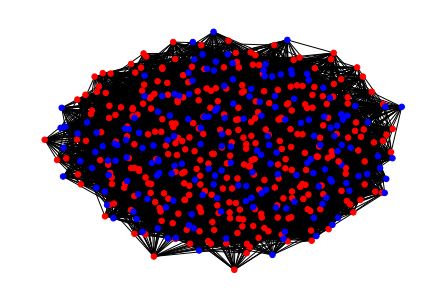

time taken to draw graph:  1.7969961669987242


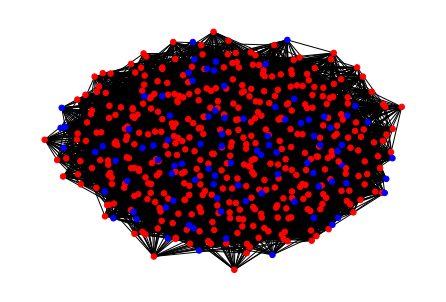

time taken to draw graph:  1.7946095439983765


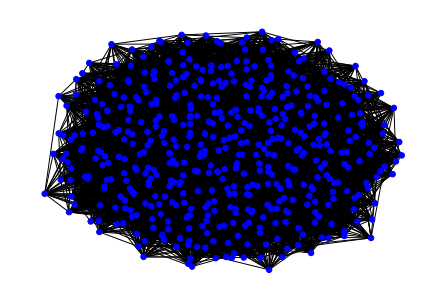

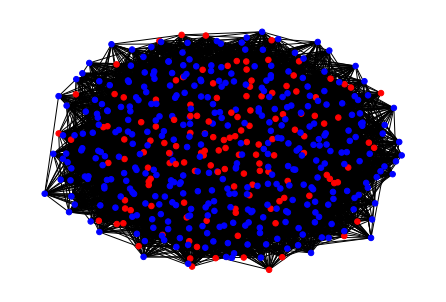

time taken to draw graph:  1.6904365390000748


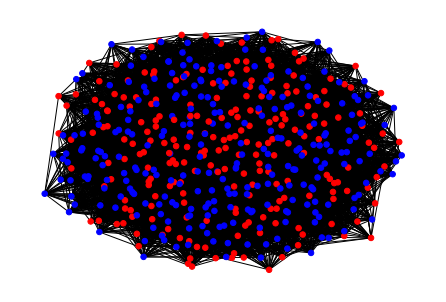

time taken to draw graph:  1.8143700979999267


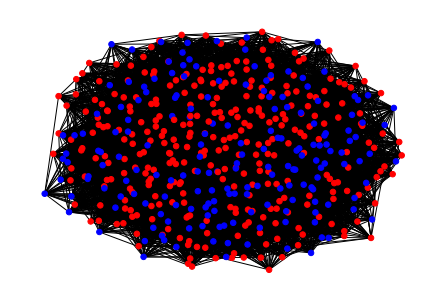

time taken to draw graph:  1.8575205769993772


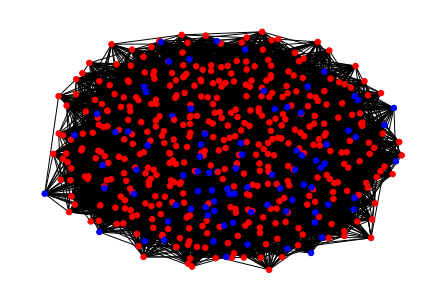

time taken to draw graph:  1.8216695240007539


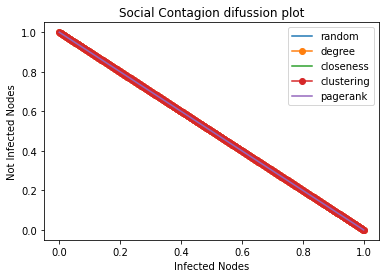

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import datetime
import pandas as pd

# Global variables
#probability of disease transmission
p=0.5  
# probability of moving to compartment R
q=0.1   
 #minimum time in compartment I
TI=10
#Infected nodes
I=[]  
#Removed nodes
R=[] 

 

# function to initiate contagion with different attack types like random and degree attack on the graph
def init_contagion(G,attack_type):
    #total no of susceptible nodes
    S=G.nodes()
    if attack_type=='random':
        for i in range(0,int(0.1*len(G.nodes()))):
            I.append(random.choice(S))
    elif attack_type=='degree':
        for i in range(0,int(0.1*len(G.nodes()))):
            I.append(random.choice(list(G.degree().keys())))
    elif attack_type=='betweenness':
        for i in range(0,int(0.1*len(G.nodes()))):
            I.append(random.choice(list(G.betweenness().keys())))
    elif attack_type=='closeness':
        for i in range(0,int(0.1*len(G.nodes()))):
            I.append(random.choice(list(G.closeness().keys())))
    elif attack_type=='pagerank':
        for i in range(0,int(0.1*len(G.nodes()))):
            I.append(random.choice(list(G.pagerank().keys())))

# function to update the graph, change the color of nodes, track the time step at which the infection occurs
def update_graph(G,I,R,time):
    for i in I:
        G.node[i]['color']='red'
    for i in R:
        G.node[i]['color']='blue'
        
    plt.title('Time step: '+str(time))
    nx.draw(G,node_color=nx.get_node_attributes(G,'color'))
    plt.show()

# repeat the above function until all nodes are in compartment R.
# for each infected node, the probability of moving to compartment R is q and minimum time in compartment I is TI
def run_simulation(G,I,R,time):
    for i in I:
        if random.random()<q:
            R.append(i)
            I.remove(i)
    for i in I:
        if random.random()<p:
            I.append(random.choice(list(G.neighbors(i))))
    for i in R:
        if random.random()<p:
            I.append(random.choice(list(G.neighbors(i))))
    for i in I:
        if time-G.node[i]['time']>TI:
            R.append(i)
            I.remove(i)
    return I,R

# for each infected node, look at neighbors and spread the contagion with probability p
# sample a random number and if it is less than p, add the node to the infected list, also change node label and color
# track the time step at which the infection occurs
def run_simulation_2(G,I,R,time):
    for i in I:
        for j in G.neighbors(i):
            if random.random()<p:
                I.append(j)
                G.node[j]['color']='red'
                G.node[j]['time']=time
    for i in I:
        if random.random()<q:
            R.append(i)
            I.remove(i)
    for i in I:
        if time-G.node[i]['time']>TI:
            R.append(i)
            I.remove(i)
    return I,R

 # draw the network and build an animation
 # for each time step, update the graph and show the animation
def draw_network(G,I,R,time):
    update_graph(G,I,R,time)
    plt.show()

# contagiones plot
def contagioness_plot():
    plt.figure() 
    plt.plot(I[0], not_infected_list[0], label="random")
    plt.plot(I[1], not_infected_list[1],marker='o', label="degree")
    plt.plot(I[2], not_infected_list[2], label="betweenness")
    plt.plot(I[3], not_infected_list[3],marker='o', label="closeness")
    plt.plot(I[4], not_infected_list[4], label="pagerank")
#     plt.plot(infected_list[5], not_infected_list[5],marker='o', label="degree")
    plt.ylabel('Not Infected Nodes')
    plt.xlabel('Infected Nodes')
    plt.title('Social Contagion difussion plot')
    plt.legend()
    plt.savefig('./contagion.pdf')
    plt.show()
    plt.close()     
    

# main function
# initialize the graph, set the initial infected nodes, run the simulation and draw the network
def main(G, attack_type):

    # set the nodes to False contagious attribute
    nx.set_node_attributes(G, False, 'contagion')

if __name__ == '__main__':
    
#     G = nx.fast_gnp_random_graph(500,0.08)   
    
    import pandas as pd
    df=pd.read_csv('/content/drive/MyDrive/amazon0302.txt',low_memory=False,header=3, sep='\t')

    df=df.iloc[0:5000]
    G = nx.from_pandas_edgelist(df,source="# FromNodeId",target="ToNodeId")
    nx.draw(G)
    main(G,'random_attack')
    main(G,'degree_attack') 
    main(G,'closeness_attack')
    main(G,'clustering_attack')
    main(G,'pagerank_attack')
    contagioness_plot()



